<a href="https://colab.research.google.com/github/Ananyas-7/ai-dyslexia-tool/blob/main/notebooks/data_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install libraries if not already installed
!pip install pandas matplotlib seaborn wordcloud textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import textstat

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset_path = "/content/drive/MyDrive/data-simplification.tar.bz2"

In [7]:
import os
# Create folder for extraction
extract_dir = "/content/drive/MyDrive/ai-dyslexia-tool/data/raw/wikilarge"
os.makedirs(extract_dir, exist_ok=True)
# Extract using tar
!tar -xvjf "/content/drive/MyDrive/data-simplification.tar.bz2" -C {extract_dir}


data-simplification/
data-simplification/wikilarge/
data-simplification/wikilarge/wiki.full.aner.map.t7
data-simplification/wikilarge/wiki.full.aner.ori.test.dst
data-simplification/wikilarge/wiki.full.aner.ori.test.src
data-simplification/wikilarge/wiki.full.aner.ori.train.dst
data-simplification/wikilarge/wiki.full.aner.ori.train.src
data-simplification/wikilarge/wiki.full.aner.ori.valid.dst
data-simplification/wikilarge/wiki.full.aner.ori.valid.src
data-simplification/wikilarge/wiki.full.aner.test.dst
data-simplification/wikilarge/wiki.full.aner.test.src
data-simplification/wikilarge/wiki.full.aner.train.dst
data-simplification/wikilarge/wiki.full.aner.train.dst.vocab.tmp.t7
data-simplification/wikilarge/wiki.full.aner.train.src
data-simplification/wikilarge/wiki.full.aner.train.src.vocab.tmp.t7
data-simplification/wikilarge/wiki.full.aner.valid.dst
data-simplification/wikilarge/wiki.full.aner.valid.src
data-simplification/wikismall/
data-simplification/wikismall/PWKP_108016.tag.80.

In [10]:
# Paths
train_src = "/content/drive/MyDrive/ai-dyslexia-tool/data/raw/wikilarge/data-simplification/wikilarge/wiki.full.aner.ori.train.src"
train_dst = "/content/drive/MyDrive/ai-dyslexia-tool/data/raw/wikilarge/data-simplification/wikilarge/wiki.full.aner.ori.train.dst"
# Load lines
with open(train_src, "r", encoding="utf-8") as f:
    src_sentences = f.readlines()
with open(train_dst, "r", encoding="utf-8") as f:
    dst_sentences = f.readlines()
print("Original:", src_sentences[0])
print("Simplified:", dst_sentences[0])


Original: There is manuscript evidence that Austen continued to work on these pieces as late as the period 1809 â '' 11 , and that her niece and nephew , Anna and James Edward Austen , made further additions as late as 1814 .

Simplified: There is some proof that Austen continued to work on these pieces later in life . Her nephew and niece , James Edward and Anna Austen , may have made further additions to her work in around 1814 .



In [11]:
import pandas as pd
df_train = pd.DataFrame({
    "original": [s.strip() for s in src_sentences],
    "simplified": [s.strip() for s in dst_sentences]
})
df_train.head()


,original,simplified
0,There is manuscript evidence that Austen conti...,There is some proof that Austen continued to w...
1,"In a remarkable comparative analysis , Mandaea...",Mandaean scholar Säve-Söderberg showed that Ma...
2,"Before Persephone was released to Hermes , who...",When Demeter went to the Underworld to rescue ...
3,Cogeneration plants are commonly found in dist...,Cogeneration plants are commonly found in dist...
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",The city 's main newspaper is the Tribune de G...


In [12]:
df_train["orig_len"] = df_train["original"].str.split().apply(len)
df_train["simp_len"] = df_train["simplified"].str.split().apply(len)
df_train[["orig_len", "simp_len"]].describe()

,orig_len,simp_len
count,296402.000000,296402.000000
mean,25.165755,18.508715
std,12.905425,11.593849
min,1.000000,1.000000
25%,16.000000,11.000000
50%,23.000000,17.000000
75%,32.000000,25.000000
max,80.000000,80.000000


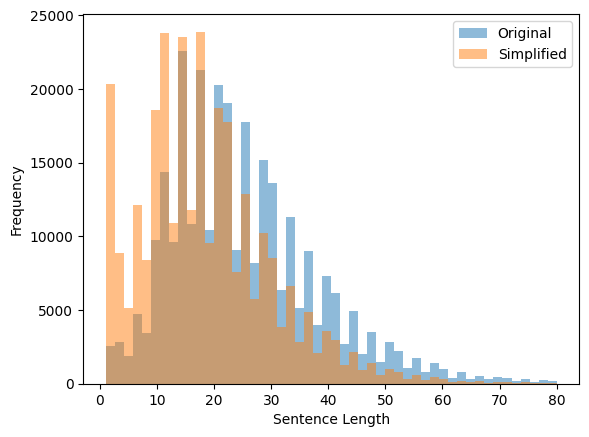

In [13]:
import matplotlib.pyplot as plt
plt.hist(df_train["orig_len"], bins=50, alpha=0.5, label="Original")
plt.hist(df_train["simp_len"], bins=50, alpha=0.5, label="Simplified")
plt.legend()
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()


In [14]:
df_train["orig_readability"] = df_train["original"].apply(textstat.flesch_reading_ease)
df_train["simp_readability"] = df_train["simplified"].apply(textstat.flesch_reading_ease)
df_train[["orig_readability", "simp_readability"]].head()


,orig_readability,simp_readability
0,45.817632,73.049643
1,16.320000,58.407500
2,43.347857,68.412866
3,15.730000,19.521818
4,33.386429,65.725000


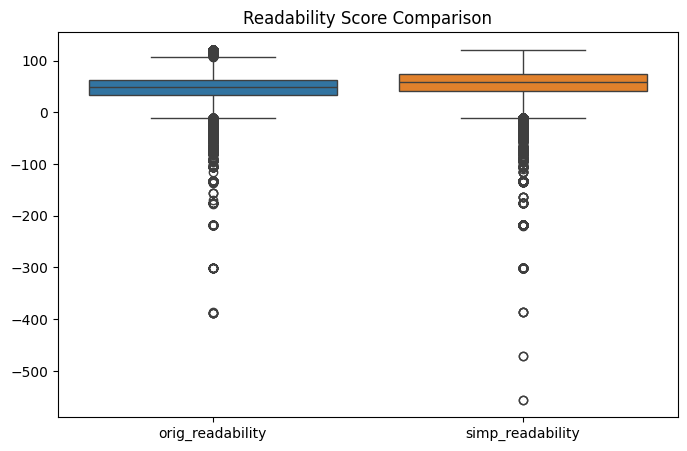

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train[["orig_readability", "simp_readability"]])
plt.title("Readability Score Comparison")
plt.show()

In [16]:
from collections import Counter
# Flatten word lists
orig_words = " ".join(df_train["original"]).split()
simp_words = " ".join(df_train["simplified"]).split()
print("Unique Original Words:", len(set(orig_words)))
print("Unique Simplified Words:", len(set(simp_words)))
# Top 20 most common words
Counter(simp_words).most_common(20)


Unique Original Words: 201841
Unique Simplified Words: 168962


[('the', 289325),
 ('.', 279758),
 (',', 253066),
 ('of', 171086),
 ('in', 140197),
 ('and', 115407),
 ('is', 112068),
 ('a', 111180),
 ('to', 70831),
 ('-RRB-', 60814),
 ('-LRB-', 60628),
 ('The', 56215),
 ('was', 55210),
 ("''", 46372),
 ('for', 31409),
 ('by', 29722),
 ('as', 29378),
 ('on', 28910),
 ('It', 27697),
 ('that', 23855)]

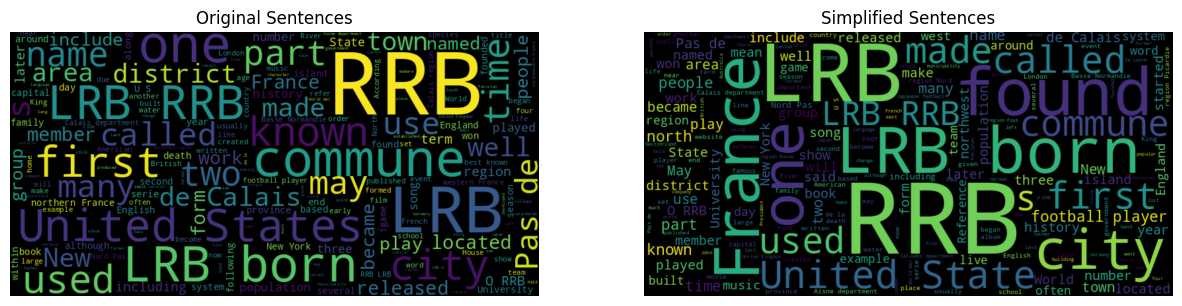

In [19]:
!pip install wordcloud
from wordcloud import WordCloud
wc_orig = WordCloud(width=800, height=400).generate(" ".join(orig_words))
wc_simp = WordCloud(width=800, height=400).generate(" ".join(simp_words))
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(wc_orig, interpolation="bilinear")
plt.axis("off")
plt.title("Original Sentences")
plt.subplot(1,2,2)
plt.imshow(wc_simp, interpolation="bilinear")
plt.axis("off")
plt.title("Simplified Sentences")
plt.show()
